# Desafío

En esta etapa, tu desafío es crear una figura que muestre las tendencias de inmigración de los 4 mayores países de América Latina: Brasil, Argentina, Perú y Colombia. A través de esta creación, puedes explorar diversas posibilidades y mostrar de manera atractiva tu proceso de desarrollo. Y no nos olvidemos de las indicaciones. Esta figura debe tener una línea para cada país, título, etiquetas en los ejes, colores apropiados, un tema de la biblioteca Seaborn y una leyenda. Por lo tanto, piensa en cuestiones de accesibilidad, como el tamaño de las fuentes y el grosor de las líneas. Es importante elegir colores adecuados que no causen fatiga visual o dificulten la lectura de la información. Además, el tamaño de las fuentes debe ser lo suficientemente legible para que las personas puedan interpretar los datos fácilmente.

Consejo: para elegir la paleta de colores, también puedes consultar la documentación de la biblioteca Matplotlib. Seaborn utiliza los colormaps de Matplotlib por defecto, además de ofrecer sus propias paletas de colores. Para aplicar una paleta de colores a todas las líneas de la figura, puedes usar la función `sns.set_palette()` y pasarle el nombre de la paleta elegida.

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("data/Inmigrantes_Canadá.csv")
df.set_index("Pais", inplace=True)

In [11]:
seleccion = df.query('Pais == "Argentina" or Pais == "Brasil" or Pais == "Perú" or Pais == "Colombia"')
top_latam = seleccion.sort_values('Total', ascending=False).head(4)
top_latam

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
Colombia,América Latina y el Caribe,América del Sur,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Perú,América Latina y el Caribe,América del Sur,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652
Brasil,América Latina y el Caribe,América del Sur,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Argentina,América Latina y el Caribe,América del Sur,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596


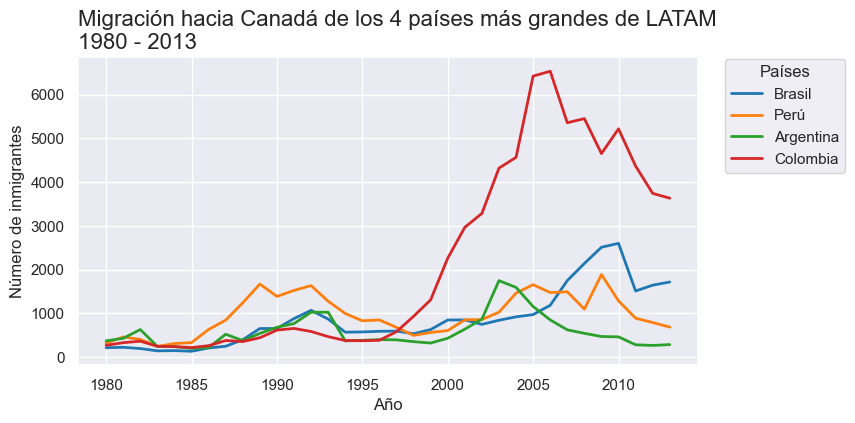

In [20]:
# tema de biblioteca Seaborn
sns.set_theme()
sns.set_palette('tab10')

anos = list(map(str, range(1980,2014)))

fig, ax = plt.subplots(figsize=(8,4))

# linea para cada país
ax = sns.lineplot(top_latam.loc['Brasil', anos], label='Brasil', lw=2)
ax = sns.lineplot(top_latam.loc['Perú', anos], label='Perú', lw=2)
ax = sns.lineplot(top_latam.loc['Argentina', anos], label='Argentina', lw=2)
ax = sns.lineplot(top_latam.loc['Colombia', anos], label='Colombia', lw=2)

#titulo
ax.set_title('Migración hacia Canadá de los 4 países más grandes de LATAM\n1980 - 2013', loc='left', fontsize=16)


# etiquetas en ejes
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Número de inmigrantes', fontsize=12)
# colores apropiados
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# leyenda
ax.legend(title='Países', loc='upper right', bbox_to_anchor=(1.25, 1.02))

plt.show()